# Import Libraries

In [2]:
!pip install contractions
!pip install --upgrade keras-nlp
!pip install --upgrade keras
#!pip install --upgrade tensorflow
!pip install tensorflow==2.8.0
!pip install transformers==4.18.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 36.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.

In [ ]:
import sys
import os

# Print Python version
print("Python version:")
print(sys.version)
print()

# Function to get the name of the virtual environment
def get_environment_name():
    venv = os.getenv('VIRTUAL_ENV')
    if venv:
        return os.path.basename(venv)
    else:
        return "No virtual environment detected"

# Print environment name
print("Environment name:")
print(get_environment_name())


Python version:
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]

Environment name:
No virtual environment detected


In [ ]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Transformers and Keras NLP
import transformers
from transformers import BertTokenizer, TFBertModel
import keras_nlp
import keras.backend as K


# Other utilities
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
import contractions
import inflect
import re

# Download necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Initialize the inflect engine
p = inflect.engine()

# Set colormap
cmap = mpl.cm.get_cmap('plasma')

# Ensure reproducibility
np.random.seed(0)


Using TensorFlow backend


<ipython-input-8-3c8f0646d36b>:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('plasma')


In [ ]:
print(f"TensorFlow version: {tf.__version__}")
print(f"transformers version: {transformers.__version__}")

TensorFlow version: 2.8.0
transformers version: 4.18.0


This code is setting an environment variable KERAS_BACKEND to either "jax", "tensorflow", or "torch". This variable specifies the backend engine that Keras, a high-level neural networks API, will use for computation.

By setting it to "jax", it indicates that Keras should use the JAX (Just Another eXperimental) backend for computation. JAX is a numerical computing library developed by Google, known for its automatic differentiation and ability to accelerate numerical code on CPUs, GPUs, and TPUs.

Alternatively, setting it to "tensorflow" indicates the use of TensorFlow as the backend, while setting it to "torch" indicates the use of PyTorch as the backend. These are other popular deep learning frameworks that can be used with Keras as the frontend API for building and training neural networks.

# Import Data/EDA

In [ ]:
!pwd

/content


In [1]:
essay_df = pd.read_csv('sample_data/train.csv')

# Randomly sample 2000 essays from the dataset, due to RAM limitations
essay_df_sampled = essay_df.sample(n=2000, random_state=42)

essay_df.head()

NameError: name 'pd' is not defined

examine the data in Numbers to get a sense of the punctuation or text traits that may need to be addressed in preprocessing.

In [ ]:
def min_max_normalization(score):
    return (score - 1) / (6-1)


# Preproccessing

In [ ]:
def contains_numeric(token):
  return any(char.isdigit() for char in token)


def convert_numbers_to_words(token):
  if contains_numeric(token):
    # Remove any punctuation from the token before conversion
    # Keeps alphanumeric, whitespace, and "."s, remove anything else
    token = re.sub(r'[^\w\s.]', '', token)

    wordString = p.number_to_words(token)

    wordString = wordString.replace("-", " ")

    # Tokenize the wordString
    tokens = word_tokenize(wordString)

    return tokens # Return the flat list of tokens instead of a list of lists
  else:
    return [token] # Return the token as a list

# Takes in a raw essay - just a long string
# Outputs a cleaned up list of tokens

def preprocess(rawEssay):
  # Step 1: replace hypens with spaces
  rawEssay = rawEssay.replace("-", " ")

  # Step 2: replace % with the word percent
  rawEssay = rawEssay.replace("%", "percent")

  # Put any other future single character manipulations here

  # Step 3: expand contractions ex: I'm -> I am
  essayExpanded = contractions.fix(rawEssay)

  # Step 4: take the big long string and turn it into tokens (individual strings)
  tokens = word_tokenize(essayExpanded) # just splitting on spaces

  # Step 5: convert the numberic tokens to one or more word tokens
  # ex: 10% -> ['ten', 'percent'] or 1.00 -> ['one', 'point', 'zero', 'zero']
  # use a new array to preserve the order of the tokens
  processedTokens = []

  # leaves non-numeric tokens alone
  for token in tokens:
    processedTokens.extend(convert_numbers_to_words(token))

  # Step 6: remove non-alphabet tokens and lowercase everything
  essayTokens = [word.lower() for word in processedTokens if word.isalpha()]

  # Step 7: remove stop words (common words like 'the', 'and', etc.)
  stop_words = set(nltk.corpus.stopwords.words('english'))
  essayTokensClean = [word for word in essayTokens if word not in stop_words]

  return essayTokensClean

In [ ]:
# Tokenize the essays
essay_df['preprocessed'] = essay_df['full_text'].apply(preprocess)
essay_df['preprocessed_str'] = essay_df['preprocessed'].apply(lambda x: ' '.join(x))

# Normalize scores
essay_df['normalized_score'] = essay_df.apply(lambda row: min_max_normalization(row['score']), axis=1)

essay_df

,essay_id,full_text,score,preprocessed,preprocessed_str,normalized_score
0,000d118,Many people have car where they live. The thin...,3,"[many, people, car, live, thing, know, use, ca...",many people car live thing know use car alot t...,0.4
1,000fe60,I am a scientist at NASA that is discussing th...,3,"[scientist, nasa, discussing, face, mars, expl...",scientist nasa discussing face mars explaining...,0.4
2,001ab80,People always wish they had the same technolog...,4,"[people, always, wish, technology, seen, movie...",people always wish technology seen movies best...,0.6
3,001bdc0,"We all heard about Venus, the planet without a...",4,"[heard, venus, planet, without, almost, oxygen...",heard venus planet without almost oxygen earth...,0.6
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,"[dear, state, senator, letter, argue, favor, k...",dear state senator letter argue favor keeping ...,0.4
...,...,...,...,...,...,...
1995,1e860bc,Driveless cars is not a smart idea. Its a posi...,2,"[driveless, cars, smart, idea, posiablity, cal...",driveless cars smart idea posiablity called sm...,0.2
1996,1e88fb2,I honestly think that we don't need driverless...,2,"[honestly, think, need, driverless, cars, reas...",honestly think need driverless cars reasoning ...,0.2
1997,1e8c487,Dont you think that having driveless cars will...,4,"[think, driveless, cars, cause, many, problems...",think driveless cars cause many problems insta...,0.6
1998,1e8cded,No! The Face found on Mars is not formed by al...,2,"[face, found, mars, formed, aliens, face, foun...",face found mars formed aliens face found mars ...,0.2


Here a Bert Tokenizer is used. The Bert (Bidirectional Encoder Representations from Transformers) is a pre-trained transformer-based model for natural language understanding tasks, trained on large amounts of text data.

Transformer-based models (like BERT), can capture intricate nuances in language usage, context, and semantics. BERT excels in understanding the relationships between different parts of the text and can provide nuanced assessments aligned with the criteria of the rubric. Additionally, the bidirectional nature allows BERT to consider the entire context of the essay when making scoring decisions.

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

def bert_vectorizer(text):
    inputs = tokenizer(text, return_tensors='tf', truncation=True, padding=True)
    outputs = bert_model(inputs)
    return tf.reduce_mean(outputs.last_hidden_state, axis=1).numpy().squeeze()



Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# just the first 2000 rows from the data: due to size of RAM needed
#this is where the shared and BERT data frame split
essay_df_BERT = essay_df.iloc[:2000]

# Vectorize!
essay_df_BERT['bert_embeddings'] = essay_df_BERT['preprocessed_str'].apply(bert_vectorizer)


In [ ]:
essay_df

,essay_id,full_text,score,preprocessed,preprocessed_str,normalized_score,bert_embeddings
0,000d118,Many people have car where they live. The thin...,3,"[many, people, car, live, thing, know, use, ca...",many people car live thing know use car alot t...,0.4,"[-0.19236295, 0.08298609, 0.6363683, 0.0106769..."
1,000fe60,I am a scientist at NASA that is discussing th...,3,"[scientist, nasa, discussing, face, mars, expl...",scientist nasa discussing face mars explaining...,0.4,"[-0.092922196, 0.3568951, 0.61868125, -0.05716..."
2,001ab80,People always wish they had the same technolog...,4,"[people, always, wish, technology, seen, movie...",people always wish technology seen movies best...,0.6,"[-0.21923193, 0.1289193, 0.74725866, 0.0657115..."
3,001bdc0,"We all heard about Venus, the planet without a...",4,"[heard, venus, planet, without, almost, oxygen...",heard venus planet without almost oxygen earth...,0.6,"[-0.40675154, 0.46219572, 0.63158137, -0.08010..."
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,"[dear, state, senator, letter, argue, favor, k...",dear state senator letter argue favor keeping ...,0.4,"[-0.2286655, 0.15533702, 0.47521192, 0.1232781..."
...,...,...,...,...,...,...,...
1995,1e860bc,Driveless cars is not a smart idea. Its a posi...,2,"[driveless, cars, smart, idea, posiablity, cal...",driveless cars smart idea posiablity called sm...,0.2,"[-0.20641454, 0.17281477, 0.67518735, 0.262342..."
1996,1e88fb2,I honestly think that we don't need driverless...,2,"[honestly, think, need, driverless, cars, reas...",honestly think need driverless cars reasoning ...,0.2,"[0.091167934, 0.19328213, 0.5347322, 0.1609850..."
1997,1e8c487,Dont you think that having driveless cars will...,4,"[think, driveless, cars, cause, many, problems...",think driveless cars cause many problems insta...,0.6,"[-0.08717857, 0.13759647, 0.7566045, 0.0769002..."
1998,1e8cded,No! The Face found on Mars is not formed by al...,2,"[face, found, mars, formed, aliens, face, foun...",face found mars formed aliens face found mars ...,0.2,"[-0.14090557, 0.32685202, 0.54560494, -0.08251..."


info check: for the first essay, did the Bert imbedding work? did it do what we expected it to? Let's check the difference between the preprocessing and the bert embedding data. It's a high dimenstional vector (768 coordinates) ... is the output what we expect to see? The output dimensions of BERT are 768-dimensional.

In [ ]:
# Print the full content of the 'bert_embeddings' column for the first row
bert_embeddings = essay_df_BERT.loc[0, 'bert_embeddings']
print(bert_embeddings)
print(len(bert_embeddings))

[-1.92362949e-01  8.29860866e-02  6.36368275e-01  1.06769074e-02
  3.74182642e-01 -3.45125288e-01 -3.92479077e-02  3.41112077e-01
 -6.50211647e-02 -4.70099241e-01  1.76800549e-01 -2.31049374e-01
  5.53200245e-02  3.07868302e-01 -5.13604701e-01  1.97924703e-01
  2.55806595e-01  6.60879910e-02 -2.67492950e-01  1.40256286e-01
  4.20323372e-01 -1.06729269e-01  3.25917721e-01  1.49777114e-01
  2.33164251e-01 -2.66135156e-01  9.52418670e-02 -1.54365540e-01
 -1.88152995e-02 -8.73150080e-02  3.39345247e-01  1.48254603e-01
 -1.40494242e-01 -1.93352684e-01  9.95634049e-02 -1.90355644e-01
 -3.24222296e-02 -7.38745555e-02  6.77717552e-02  2.16156736e-01
 -2.56184042e-01 -3.89201999e-01 -3.02773386e-01  4.86161411e-02
 -3.49825740e-01 -6.72156364e-02 -5.30487113e-03  6.48419112e-02
  4.74616401e-02 -2.74416715e-01 -1.58299312e-01 -1.19155843e-03
 -7.21136779e-02  1.24721296e-01  2.14930009e-02  3.63495052e-01
 -2.89259627e-02 -2.53422171e-01 -2.89860547e-01 -1.74504042e-01
  2.88238794e-01 -1.11479

looks good - one vector with 768 dimensions. This is what we expected the function to output.

In [ ]:
# Set the seed for reproducibility
np.random.seed(42)

# Generate 5 random indices
random_indices = np.random.choice(essay_df_BERT.index, size=5, replace=False)

# Print the full text and preprocessed text for each random row
for index in random_indices:
  print("Row Index:", index)
  print("Full Text:")
  print(essay_df_BERT.loc[index, 'full_text'])
  print("\nPreprocessed Text:")
  print(essay_df_BERT.loc[index, 'preprocessed'])
  print("\n" + "="*50 + "\n") # add a separator between rows

Row Index: 1860
Full Text:
Many people have different opinions about what happens on the planet Mars. During a recent discovery many people had the idea that the face on mars was created by aliens. Scientists had a different theory. Scientists believed that the face was formed by something more believable. Aliens was not one of those.

On May 24th NASA's Viking 1 spacecraft was on Mars. The spacecraft was going about it's regular mission until it noticed something interesting. The text states, "..when it spotted the shadowy likenss of a human face." The text states, "A few days later NASA unveiled the image for all to see." Once NASA revealed the images for the world to see, many of them claimed it was from aliens. Scientists had to quickly do their research to clear up false accusations. The text states, "Thousands of anxious web surfers were waiting when the image first appeared on a JPL web site, revealing...a natural landform. There was no alien monument after all." Once NASA clear

This is a check with the preprocessed and the full text next to each other to be sure that the preprocessing worked the way that it was suppoed to - the preprocessed text is a list of strings; exactly what we expect.

In [ ]:
# Prepare the data for Keras model
X = np.stack(essay_df_BERT['bert_embeddings'].values)
y = essay_df_BERT['score'].values
from tensorflow.keras.utils import to_categorical

# One-hot encode the target labels
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# categorical data (score/grade)
# Step 1: Convert grade to integer labels
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)

# Step 2: Reshape the data to be a 2D array as required by OneHotEncoder
integer_encoded = integer_encoded.reshape(-1, 1)

# Step 3: Apply OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_one_hot_encoded = onehot_encoder.fit_transform(integer_encoded)

# Print the results
print("Original Categories:", y)
print("Integer Encoded:", integer_encoded.ravel())
print("One-Hot Encoded:\n", y_one_hot_encoded)
#.unique

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot_encoded, test_size=0.2, random_state=42)

Original Categories: [3 3 4 ... 4 2 3]
Integer Encoded: [2 2 3 ... 3 1 2]
One-Hot Encoded:
 [[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


When fine-tuning transformer-based models like BERT for essay scoring to align with a grading rubric, several hyperparameters can be adjusted to optimize performance:

Learning Rate: This hyperparameter controls the step size during the optimization process. It can be tuned to ensure that the model learns at an appropriate pace, effectively updating its parameters to minimize the loss function.

Batch Size: The batch size determines the number of samples processed in each training iteration. Adjusting this hyperparameter can impact the model's generalization ability and training speed.

Number of Training Epochs: The number of training epochs specifies how many times the entire training dataset is passed through the model. Fine-tuning may require experimenting with different numbers of epochs to achieve optimal performance without overfitting.

Dropout Rate: Dropout is a regularization technique that randomly drops a fraction of input units during training to prevent overfitting. Tuning the dropout rate can help balance model complexity and generalization.

Layer-specific Hyperparameters: Some transformer architectures, such as BERT, have multiple layers with their own hyperparameters, such as the number of attention heads, hidden units, and feedforward layer sizes. Fine-tuning these parameters can be beneficial for adapting the model to specific tasks and datasets.

In [ ]:
# Build and compile a simple Keras model
input_dim = X_train.shape[1] #number of features
#dimensionality of the vectors is specified [1] chooses which feature in the set

#multiclass
#Number of classes
num_classes = y_one_hot_encoded.shape[1] #number of classes


# Build and compile a simple Keras model for multiclass classification
#like specificying how each split decision is made in a decision tree
inputs = Input(shape=(input_dim,)) #input layer; shape 768 dimensions; setting up an empty framework
x = Dense(128, activation='relu')(inputs) # x=hidden layer; each input gets an additional hidden layer added to the previous group
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_classes, activation='softmax')(x)  # Softmax activation for multiclass classification


model = Model(inputs=inputs, outputs=outputs)

#multiclass
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#optimizer = AdamW(model.parameters(), lr=learning_rate), consider tuning these in future

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 768)]             0         
                                                                 
 dense (Dense)               (None, 128)               98432     
                                                                 
 dropout_37 (Dropout)        (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_38 (Dropout)        (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 107,078
Trainable params: 107,078
Non-trainable

# Model Training


Predictions are probabilities of which class (grade) the essay will be placed in

In [ ]:
# step 4: Build and Train the Neural Network Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=32, validation_split=0.2)

#multiclass
# Predictions on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print (y_train_pred)
print (y_test_pred)




Epoch 1/500
40/40 [==============================] - 1s 14ms/step - loss: 1.5918 - accuracy: 0.3250 - val_loss: 1.4491 - val_accuracy: 0.3688
Epoch 2/500
40/40 [==============================] - 0s 6ms/step - loss: 1.4804 - accuracy: 0.3523 - val_loss: 1.3820 - val_accuracy: 0.4156
Epoch 3/500
40/40 [==============================] - 0s 7ms/step - loss: 1.4022 - accuracy: 0.4117 - val_loss: 1.3223 - val_accuracy: 0.5031
Epoch 4/500
40/40 [==============================] - 0s 6ms/step - loss: 1.3266 - accuracy: 0.4273 - val_loss: 1.2302 - val_accuracy: 0.4656
Epoch 5/500
40/40 [==============================] - 0s 4ms/step - loss: 1.2447 - accuracy: 0.4891 - val_loss: 1.1526 - val_accuracy: 0.5312
Epoch 6/500
40/40 [==============================] - 0s 4ms/step - loss: 1.2173 - accuracy: 0.4984 - val_loss: 1.1488 - val_accuracy: 0.5469
Epoch 7/500
40/40 [==============================] - 0s 4ms/step - loss: 1.2038 - accuracy: 0.5141 - val_loss: 1.1214 - val_accuracy: 0.5375
Epoch 8/500


In [ ]:
# Convert probabilities to class predictions
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

print(y_train_pred_classes)
print(y_test_pred_classes)
print(y)
print(y_one_hot_encoded)

[2 2 2 ... 2 1 2]
[2 2 2 1 1 2 1 2 1 3 1 1 1 2 2 3 1 2 3 1 0 1 2 0 1 3 1 2 1 1 2 3 2 2 1 2 1
 1 2 3 1 3 1 2 2 2 2 3 3 2 3 3 2 2 1 3 3 1 1 1 2 2 2 3 2 1 2 1 3 1 3 1 2 1
 3 1 1 2 0 3 2 4 1 2 1 1 3 1 2 1 3 3 1 2 1 1 0 2 1 1 1 2 0 1 1 2 4 2 2 2 1
 3 1 3 1 2 3 2 3 0 2 2 2 1 2 2 1 3 1 2 1 2 2 2 2 1 1 4 2 2 1 1 2 0 2 2 0 0
 2 2 1 1 1 2 3 1 3 3 1 2 1 1 1 2 2 1 3 3 2 1 1 2 3 2 2 3 2 2 3 3 4 2 3 2 3
 1 1 1 3 3 1 3 2 3 1 4 1 2 1 1 2 1 3 2 2 2 2 3 1 2 4 3 2 2 2 4 1 2 4 1 1 2
 3 1 2 1 2 1 1 3 1 3 3 3 2 3 2 2 2 2 2 2 3 2 2 1 1 2 1 2 0 3 1 3 1 2 0 2 3
 2 2 1 1 3 4 1 3 1 2 3 3 2 1 2 1 1 1 1 2 2 3 3 1 1 2 2 1 1 2 2 1 1 1 1 2 2
 3 1 2 2 0 2 1 2 2 2 1 1 3 2 2 2 3 4 3 1 1 3 2 1 1 3 1 1 3 3 1 3 1 4 3 1 2
 2 1 2 1 0 1 2 2 2 1 1 2 3 2 1 0 2 1 2 2 1 2 2 2 2 1 3 2 1 2 3 0 1 1 0 2 2
 2 1 2 1 1 2 3 1 2 2 0 1 2 1 3 1 2 2 1 1 2 1 2 0 2 1 2 3 2 3]
[3 3 4 ... 4 2 3]
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


Here we were confirming that the data was decoded correctly. When the data is encoded, it's hard to know exactly what is going on.

In [ ]:
# Convert integer labels to original categories
predicted_categories_train = label_encoder.inverse_transform(y_train_pred_classes)
predicted_categories_test = label_encoder.inverse_transform(y_test_pred_classes)
print(predicted_categories_train)
print(predicted_categories_test)

[3 3 3 ... 3 2 3]
[3 3 3 2 2 3 2 3 2 4 2 2 2 3 3 4 2 3 4 2 1 2 3 1 2 4 2 3 2 2 3 4 3 3 2 3 2
 2 3 4 2 4 2 3 3 3 3 4 4 3 4 4 3 3 2 4 4 2 2 2 3 3 3 4 3 2 3 2 4 2 4 2 3 2
 4 2 2 3 1 4 3 5 2 3 2 2 4 2 3 2 4 4 2 3 2 2 1 3 2 2 2 3 1 2 2 3 5 3 3 3 2
 4 2 4 2 3 4 3 4 1 3 3 3 2 3 3 2 4 2 3 2 3 3 3 3 2 2 5 3 3 2 2 3 1 3 3 1 1
 3 3 2 2 2 3 4 2 4 4 2 3 2 2 2 3 3 2 4 4 3 2 2 3 4 3 3 4 3 3 4 4 5 3 4 3 4
 2 2 2 4 4 2 4 3 4 2 5 2 3 2 2 3 2 4 3 3 3 3 4 2 3 5 4 3 3 3 5 2 3 5 2 2 3
 4 2 3 2 3 2 2 4 2 4 4 4 3 4 3 3 3 3 3 3 4 3 3 2 2 3 2 3 1 4 2 4 2 3 1 3 4
 3 3 2 2 4 5 2 4 2 3 4 4 3 2 3 2 2 2 2 3 3 4 4 2 2 3 3 2 2 3 3 2 2 2 2 3 3
 4 2 3 3 1 3 2 3 3 3 2 2 4 3 3 3 4 5 4 2 2 4 3 2 2 4 2 2 4 4 2 4 2 5 4 2 3
 3 2 3 2 1 2 3 3 3 2 2 3 4 3 2 1 3 2 3 3 2 3 3 3 3 2 4 3 2 3 4 1 2 2 1 3 3
 3 2 3 2 2 3 4 2 3 3 1 2 3 2 4 2 3 3 2 2 3 2 3 1 3 2 3 4 3 4]


In [ ]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred_classes)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred_classes)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.845625
Test Accuracy: 0.5225


This data looks good.

# Final Evaluation

13/13 [==============================] - 0s 3ms/step - loss: 3.0075 - accuracy: 0.5225
Test Loss: 3.0075409412384033
Test Accuracy: 0.5224999785423279


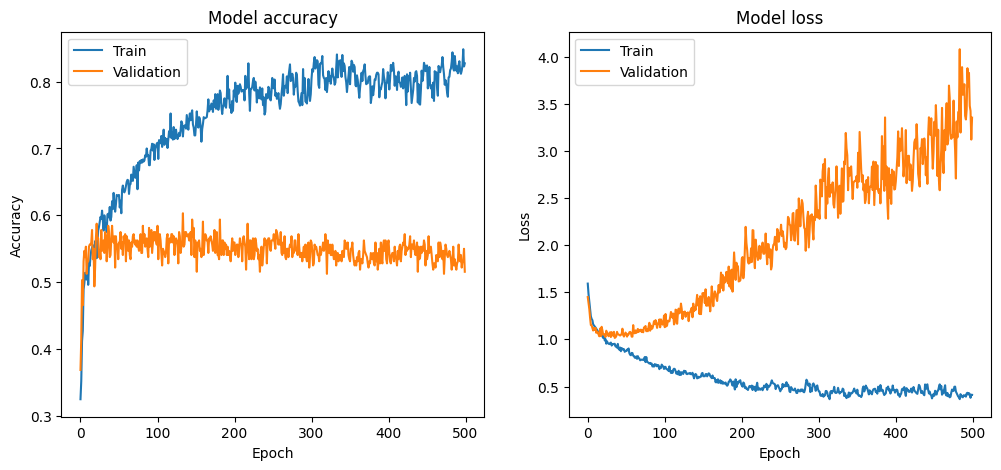

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plot the training and validation accuracy/loss over epochs
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

A plot that looks like this is a reasonable training scheme. The loss has a minimum which means that there is an optimal training timesclae to prevent overfitting. The X axis the amount of training and there seems to be a training sweetspot (more epoch is more training) too many epochs = overfitting.

In [ ]:
|

SyntaxError: invalid syntax (<ipython-input-31-4b37ef281455>, line 1)

Proof of concept practice/extra code

In [ ]:
#X_bow_array_df = pd.DataFrame(X_bow_array)
#X_bow_array_df
#value_summary = X_bow_array_df['Value'].describe()
#print(value_summary)

In [ ]:
for index in random_indices:
    print("Row Index:", index)
    print("\nPreprocessed Text:")
    print(essay_df.loc[index, 'preprocessed'])
    print("\nBOWVector dictionary:")
    print(essay_df.loc[index, 'BOWVector'])
    print("\n" + "="*50 + "\n")  # Add a separator between rows

In [ ]:
essay = "The Quick 10% of two 1,000 Foxes, Jumped! can't 1.00 won't wouldn't : would've I'm she's. 1982 (044). well-being model -T position-estimating"

In [ ]:
essay = essay.replace("-", " ")
essay = essay.replace("%", " percent ")

In [ ]:
essay_expanded = contractions.fix(essay)
essay_expanded

In [ ]:
tokens = word_tokenize(essay_expanded) # just splitting on spaces
tokens

In [ ]:
def contains_numeric(token):
    return any(char.isdigit() for char in token)

def convert_numbers_to_words(token):
    if contains_numeric(token):
        # Remove any punctuation from the token before conversion
        token = re.sub(r'[^\w\s.]', '', token)

        wordString = p.number_to_words(token)

        wordString = wordString.replace("-", " ")

        # Tokenize the wordString
        tokens = word_tokenize(wordString)

        return tokens  # Return the flat list of tokens instead of a list of lists
    else:
        return [token]  # Return the token as a list

In [ ]:
processedTokens = []

for token in tokens:
    processedTokens.extend(convert_numbers_to_words(token))

processedTokens

In [ ]:
# Remove punctuation and convert to lowercase
essayTokens = [word.lower() for word in processedTokens if word.isalpha()]
essayTokens

In [ ]:
# Optionally, remove stopwords (common words like 'the', 'and', etc.)
stop_words = set(nltk.corpus.stopwords.words('english'))
essayTokensClean = [word for word in essayTokens if word not in stop_words]
essayTokensClean

Other options before vectorizing: stemming, lemmatization, stop words (which we already did), other types of token manipulations (might include context), spelling consideration...

In [ ]:
# VECTORIZE!

bowRepresentation = Counter(essayTokensClean)
bowRepresentation

In [ ]:
essay2 = "The Quick 10% of two 1,000 Foxes, Jumped! can't 1.00 won't wouldn't : would've I'm she's. 1982 (044). well-being model -T position-estimating"